In [1]:
#scikit-learn and nltk together to perform NLP and 
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
#load the data
from sklearn.model_selection import train_test_split
df_tweets = pd.read_csv(r"C:\Users\kianh\finsights\finsights\archive\stock_tweets.csv")
df_yf = pd.read_csv(r"C:\Users\kianh\finsights\finsights\archive\stock_yfinance_data.csv")
#test_size is the proportion of the data to use for testing
#random_state is sets a seed for the random number generator to ensure reproducbility
#split the data into training and testing data
#the following line splits the 'Tweet'
X_train, X_test, y_train, y_test = train_test_split(df_tweets['Tweet'], df_tweets['Tweet'], test_size=0.2, random_state=42)

In [32]:
columns = df_train.columns
print(columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [33]:
#tokenize the data
from nltk.tokenize import word_tokenize
df_tweets['tokens'] = df_tweets['Tweet'].apply(word_tokenize)

In [34]:
#remove the stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_tweets['text_without_stopwords'] = df_tweets['Tweet'].apply(lambda x: [' '.join([word for word in sentence.split() if word not in stop_words]) for sentence in x])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#vectorization - the process of converting data into numerical arrays
#or vectors that can be used as input for a model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df_tweets['Tweet'])

In [7]:
#modeling
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer
#reflects how important a word is o a document in a collection
tfidf = TfidfVectorizer()

# Fit and transform the data to create the term-document matrix
tdm = tfidf.fit_transform(df_tweets['Tweet'])

In [9]:
#Create a term-document matrix
from sklearn.decomposition import TruncatedSVD
import scipy.sparse
#create the sparse matrix after the TfidVectorizer is applied
sparse_matrix = scipy.sparse.csr_matrix(tdm)

#initiliaze TruncatedSVD instance
lsa = TruncatedSVD(n_components=50)

#perform LSA
lsa.fit(sparse_matrix)
#dtm_lsa is a transformed version of the sparse matrix
#the transform method makes lsa(svd) fits lsa model to the model
dtm_lsa = lsa.transform(sparse_matrix)

In [10]:
#inspect the results
print(lsa.singular_values_)

[42.60978993 21.43464642 19.13859734 18.84821885 17.20834901 16.53408636
 15.99609325 15.02041159 14.71442382 14.52868028 14.2278     13.85784551
 13.56152654 13.45056303 13.3792141  13.2241048  12.97330395 12.95202347
 12.7795157  12.52138249 12.47540355 12.29704285 12.1981704  12.03006908
 12.01888084 11.84780444 11.7426723  11.61759926 11.53255943 11.32535917
 11.2475756  11.18170164 11.10188225 11.06129738 10.93106431 10.86053909
 10.82038865 10.71538652 10.70429048 10.66834088 10.49748281 10.47258942
 10.44180313 10.41482106 10.24397986 10.19937984 10.16681718 10.10652685
  9.9388814   9.93355814]


In [11]:
!pip install annoy

In [12]:
from scipy.sparse import lil_matrix
import annoy

# Initialize a sparse matrix to store the similarity matrix
similarity_matrix = lil_matrix((dtm_lsa.shape[0], dtm_lsa.shape[0]))

# Initialize Annoy index
index = annoy.AnnoyIndex(dtm_lsa.shape[1], 'angular')

# Add items to index
for i in range(dtm_lsa.shape[0]):
    index.add_item(i, dtm_lsa[i])

# Build the index
index.build(10)

# Set k to a relatively small value
k = 10

# Compute the pairwise similarities
for i in range(dtm_lsa.shape[0]):
    nn = index.get_nns_by_item(i, k, include_distances=True)
    for j in range(len(nn[0])):
        similarity_matrix[i,nn[0][j]] = nn[1][j]


# Save the sparse matrix to disk
from scipy.sparse import save_npz
save_npz('similarity_matrix.npz', similarity_matrix.tocsr())

In [13]:
print(dtm_lsa.shape[0])

80793


In [14]:
# Compute the pairwise similarities
# using a subset for now to test my model and keep making progress
dtm_lsa_subset = dtm_lsa[:1000, :]
for i in range(dtm_lsa_subset.shape[0]):
    nn = index.get_nns_by_item(i, dtm_lsa_subset.shape[0], include_distances=True)
    for j in range(len(nn[0])):#replace 1 with len(nn[0])
        similarity_matrix[i,nn[0][j]] = nn[1][j]

In [15]:
#test the LSA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
#K-means clustering is a way of unsupervised learning
#the K-means clustering algorithm aims to partition a set of points
#where each of the points belongs to the cluster with the nearest mean
#Steps of the K-means algorithm:
#1.Initalize the centroids of the K clusters by choosing K data points randomly from the dataset
#2.Assign each data point to the cluster whose centroid is closet to it.
#3.Recompute the centroid of each cluster as the mean of the points assigned to it.
#4.Repeat 2 and 3 until the assignments of the points to clusters doesnt change

In [17]:
#Ways I can test my model:
# 1.Split data into training/test set
# 2.Cross-validation
# 3.Qualitative evaluation
# 4.Evaluation using external knowledge
# 5.Evaluation using downstream tasks

In [18]:
#initialize the K-mean clustering algorithm
kmeans = KMeans(n_clusters=100)
#fit the LSM to the K-Means algorithm

C:\Users\kianh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\kianh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


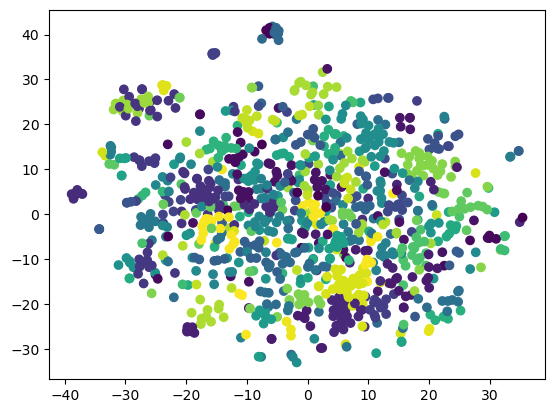

In [19]:
#test the graphical data
#plot the results
#Use t-SNE to reduce the dimensionality of the LSM
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_data = tsne.fit_transform(dtm_lsa_subset)

#Plot the results
kmeans.fit(dtm_lsa_subset)
labels = kmeans.labels_
plt.scatter(low_data[:, 0], low_data[:, 1], c=kmeans.labels_) #used to be "c=kmeans.labels_"
plt.show()


In [20]:
#test the numerical data
from sklearn.metrics import adjusted_rand_score

# predict the labels
predicted_labels = kmeans.predict(dtm_lsa_subset)

# calculate the adjusted rand score
score = adjusted_rand_score(labels, predicted_labels)

# print the score
print("Adjusted Rand Score: ", score)

Adjusted Rand Score:  1.0
